Notebook del modelo de árbol de decisión del dataframe de las peleas ponderadas

- **Tarea del backlog:** https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/31
- **Propósito del código:** Árbol de clasificación para el dataframe de peleas ponderadas (P2).
- **Autor(es):** Carlos Vallejo.  
- **Descripción y uso:** Ejecutar para ver el resultado del modelo de árbol de clasificación en P2.
- **Estado actual:** Primer modelo, falta mejorarlo.

In [22]:
#NO BORRAR ESTA CELDA!!!!!!!!!!!!!!!!

#Marca con un * al final las que ya estén solucionadas

#Solucionar:
#No hay estudio de transformaciones *
#Se evaluan los modelos con accuracy en vez de f1-score (se explica el porque en la memoria) *
#Explica cada modelo un poco: que hace, porque lo usas
#No hay estudio de selección de variables. Si es necesario hacer una selección indicar que algoritmo de selección de variables usar. *

In [23]:
import os
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss, f1_score, roc_auc_score, precision_score, recall_score #, make_scorer
#from sklearn.preprocessing import MinMaxScaler
from sklearn import tree  
from sklearn.tree import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
ruta_train =  os.path.join("..","..", "data", "P2_dif","train.parquet")
train = pd.read_parquet(ruta_train)
train.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2010-01-02,Rashad Evans,Thiago Silva,False,-0.3,-0.239,0.230769,-0.2,0.0,1.2,...,17.3,4.0,4.223836,0.5,-0.7,0.0,4.0,-0.3,0.0,1.0
1,2010-01-02,Sam Stout,Joe Lauzon,False,0.5,-0.252,-0.331250,-3.0,0.0,-104.6,...,-2.0,1.0,-2.396327,-0.9,-1.8,-2.5,2.5,-1.0,1.0,2.8
2,2010-01-11,Rafael Dos Anjos,Kyle Bradley,False,0.0,-0.114,-0.082353,1.3,0.3,187.2,...,0.0,0.0,0.000000,0.0,-0.5,0.0,0.5,-0.8,0.0,0.8
3,2010-01-11,Amir Sadollah,Brad Blackburn,False,-1.1,0.048,0.000000,-0.1,0.0,110.6,...,-3.0,0.0,-0.546865,-1.0,-1.0,1.0,-0.8,0.8,0.0,0.0
4,2010-01-11,Gray Maynard,Nate Diaz,False,0.0,0.062,0.142089,-1.3,-0.6,158.4,...,-2.4,-1.0,-0.943809,3.3,1.0,-4.5,3.3,0.0,0.0,-1.8


In [25]:
ruta_val = os.path.join("..","..", "data", "P2_dif","validation.parquet")
val = pd.read_parquet(ruta_val)
val.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2021-10-30,Magomed Ankalaev,Volkan Oezdemir,False,0.2,0.074,0.272727,0.0,0.0,157.9,...,0.0,-2.0,62.537106,3.0,0.8,0.0,-0.3,-1.5,0.0,-1.0
1,2021-10-30,Jan Blachowicz,Glover Teixeira,True,0.2,-0.173,0.031746,-1.4,-0.4,-253.0,...,-23.3,-4.0,92.929969,0.0,-2.0,-3.5,1.5,-1.0,0.0,1.0
2,2021-10-30,Alexander Volkov,Marcin Tybura,False,0.3,0.088,-0.263158,0.0,0.0,-128.4,...,10.0,-4.0,9.933111,-2.0,0.5,0.0,-2.0,-2.0,0.0,-0.5
3,2021-10-30,Makwan Amirkhani,Lerone Murphy,True,0.0,-0.090,0.257778,-0.2,-0.2,78.4,...,3.0,7.0,8.305570,-1.0,0.2,3.0,0.5,1.0,0.0,2.3
4,2021-10-30,Amanda Ribas,Virna Jandiroba,False,0.0,-0.015,0.083333,-0.2,0.2,128.1,...,-7.0,0.0,37.406009,2.5,-0.5,-0.2,2.0,0.5,0.0,-1.8


In [26]:
ruta_test = os.path.join("..","..", "data", "P2_dif","test.parquet")
test = pd.read_parquet(ruta_test)
test.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2023-06-17,Nicolas Dalby,Muslim Salikhov,False,-0.2,-0.049,-0.163685,0.3,0.3,76.4,...,0.4,2.0,-92.867755,-1.6,-2.5,0.0,1.3,-0.8,-1.0,4.0
1,2023-06-24,Randy Brown,Wellington Turman,False,0.3,-0.213,-0.173077,-0.8,0.3,-111.7,...,-1.0,8.0,108.879508,2.0,2.0,2.2,2.8,0.0,1.5,-0.5
2,2023-06-24,Josh Emmett,Ilia Topuria,True,-0.6,-0.133,-0.017316,-0.5,0.2,-2.2,...,4.0,7.0,46.125005,1.0,0.2,-0.5,4.8,1.0,0.5,1.0
3,2023-06-24,Neil Magny,Phil Rowe,False,-0.5,-0.028,0.233871,-0.7,0.0,28.6,...,11.4,25.0,87.742466,-0.4,2.7,1.8,13.0,2.0,4.5,1.0
4,2023-06-24,Amanda Ribas,Maycee Barber,True,0.0,-0.100,0.008929,0.2,-0.7,205.2,...,-1.0,-1.0,-31.227306,-2.0,-3.0,2.0,0.2,1.0,0.0,-1.2


TRANSFORMACIONES

No es necesario hacer transformaciones para hacer un árbol de decisión ya que estos pueden manejar los datos sin estos cambios.

SELECCIÓN DE VARIABLES

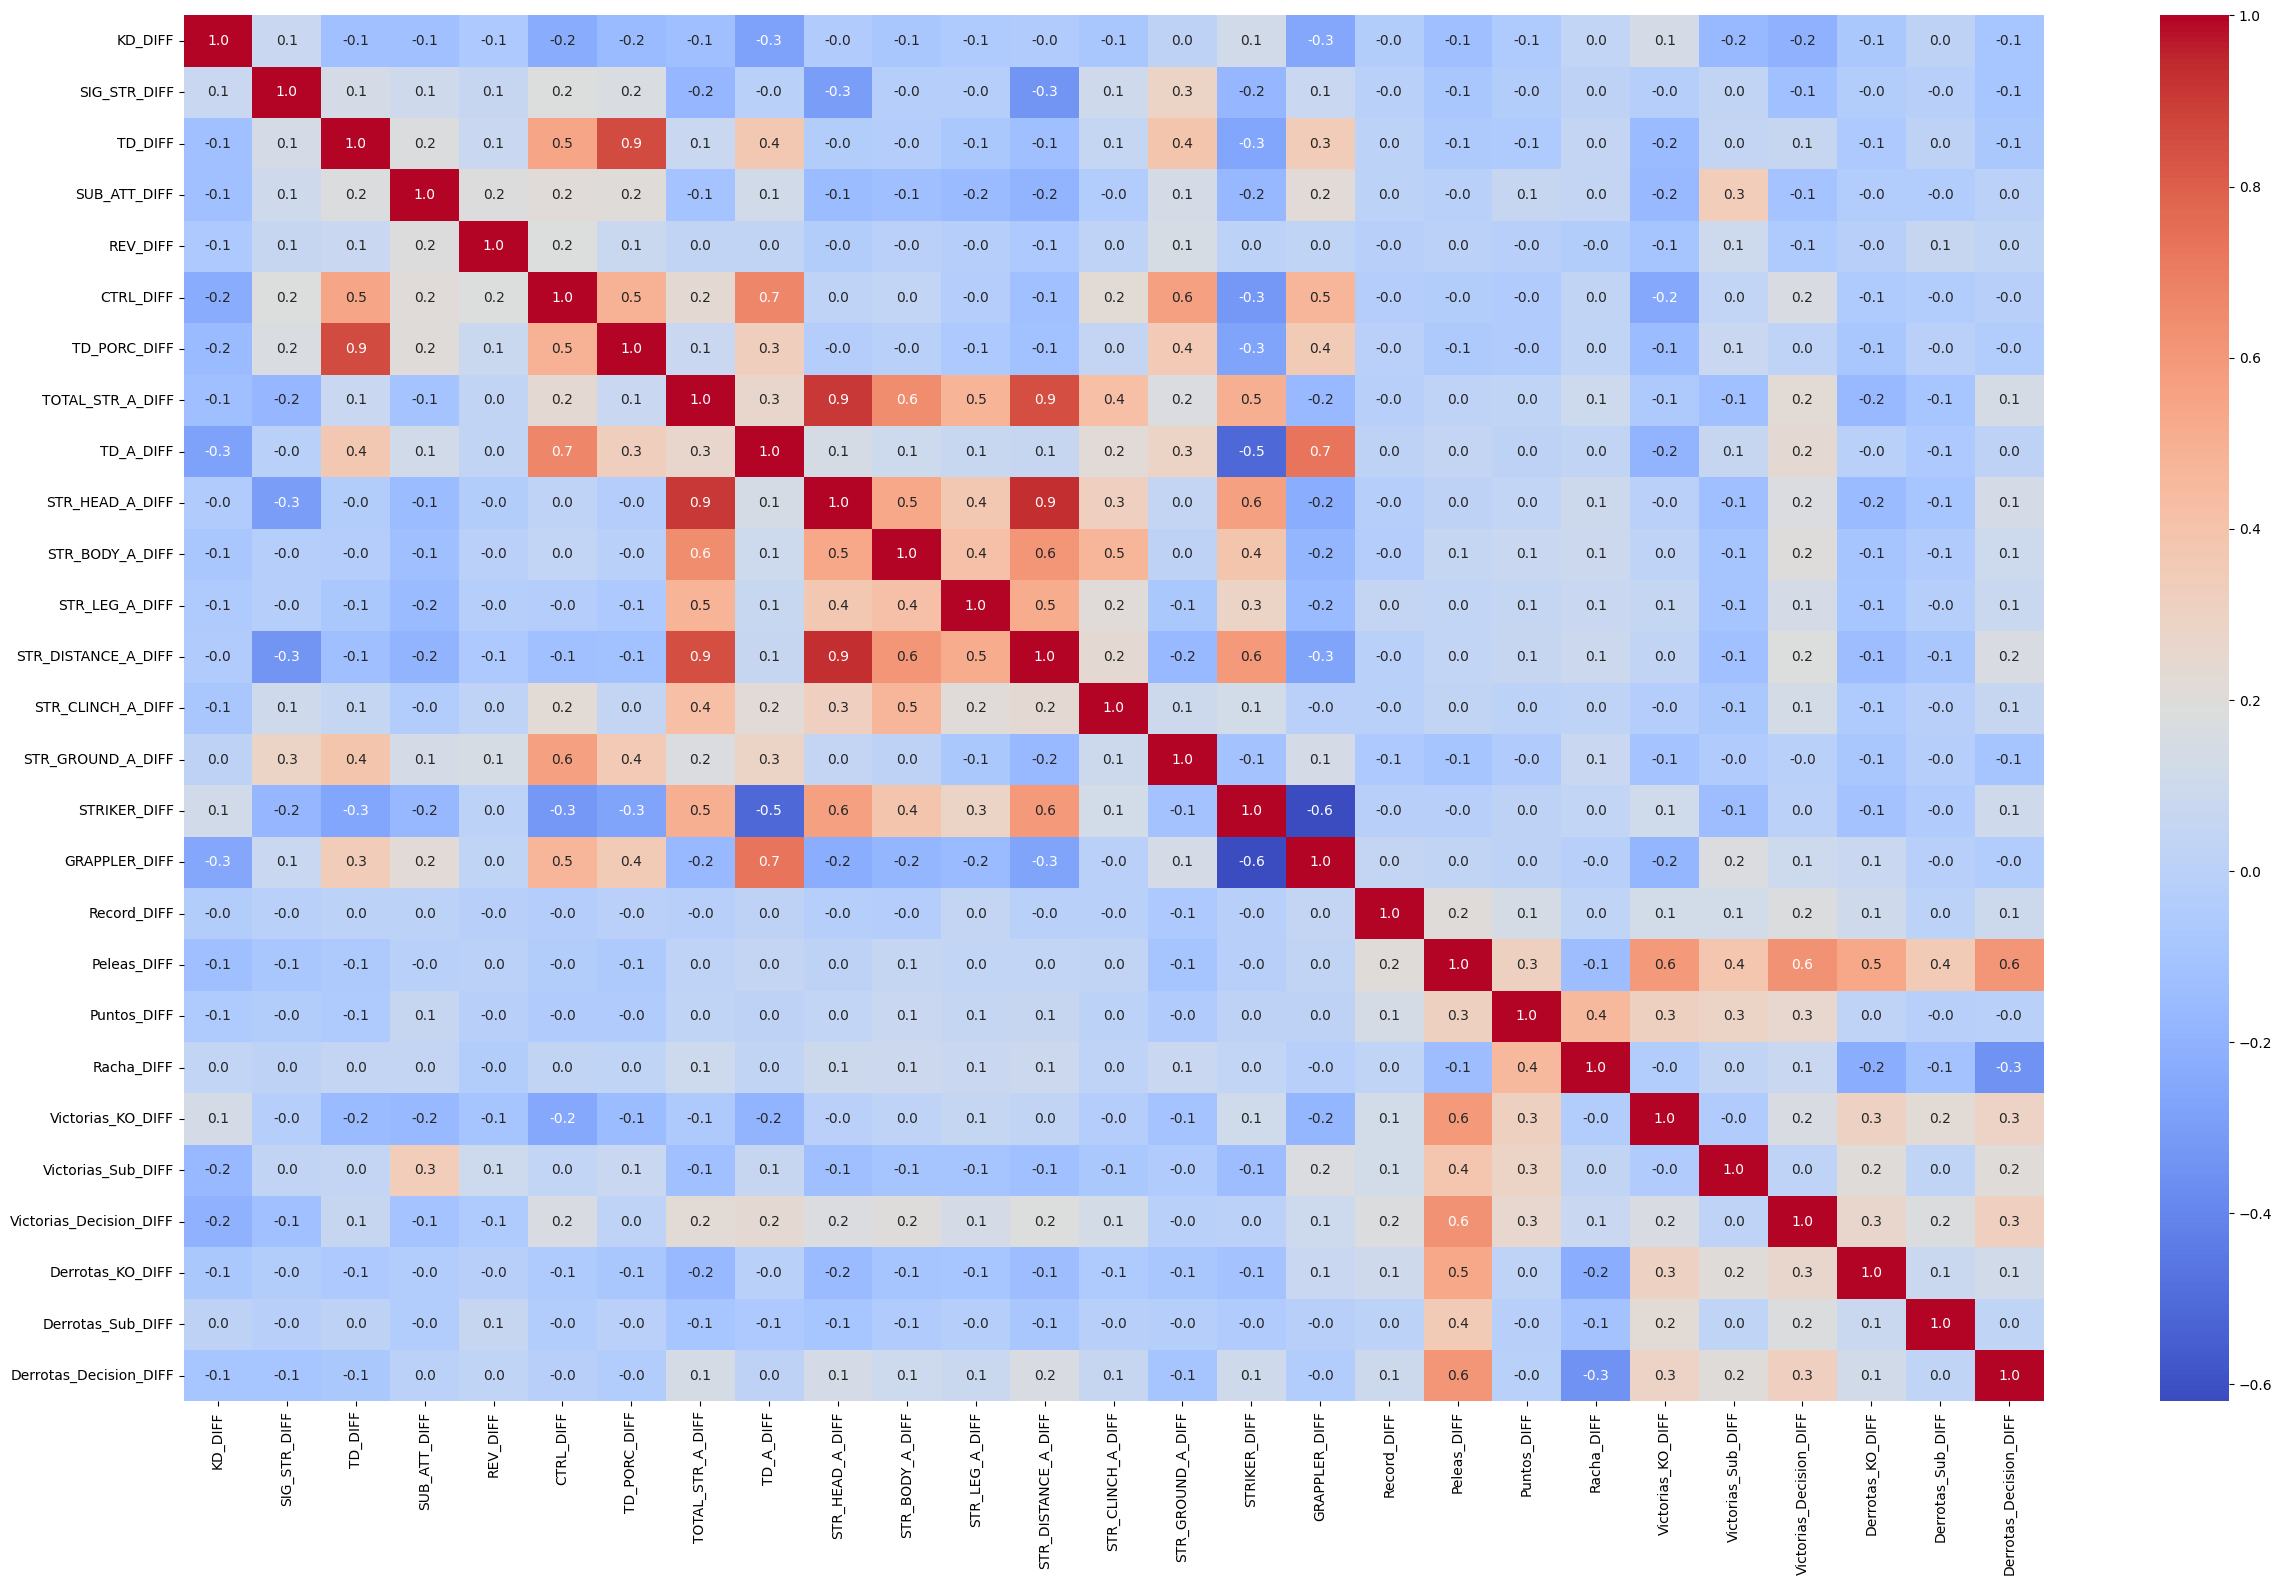

In [27]:
cor = train.drop(columns=['DATE','Peleador_A','Peleador_B','WINNER'])
plt.figure(figsize=(30, 18))
sns.heatmap(cor.corr(method="spearman"), annot=True, cmap="coolwarm", fmt=".1f")
plt.show()

#Podemos observar cierta correlación positiva de las columnas: 'TOTAL_STR_A_x','TOTAL_STR_B_x','TOTAL_STR_A_y','TOTAL_STR_B_y' con otras.
#Además vemos una especie de cuadrado en el centro con correlaciones significantes en las que participan las variables: 'STR_HEAD_A_x',
# 'STR_HEAD_B_x','STR_HEAD_A_y','STR_HEAD_B_y','STR_BODY_A_x','STR_BODY_B_x','STR_BODY_A_y','STR_BODY_B_y','STR_LEG_A_x','STR_LEG_B_x',
# 'STR_LEG_A_y', 'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_B_x', 'STR_DISTANCE_A_y', 'STR_DISTANCE_B_y'.
#Por último también se aprecia correlación no tan alta en las variables: 'Peleas_A','Peleas_B'.

columnasQuitar = ["DATE","Peleador_A","Peleador_B", "WINNER"]

AJUSTE DE HIPERPARÁMETROS

Para ajustar los parámetros hemos utilizado dos estrategias, GridSearchCV y RandomizedSearchCV.

In [28]:
def train_decision_tree_grid(X_train, y_train, X_val, y_val):
    from sklearn.tree import plot_tree
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Definir modelo base
    dt = DecisionTreeClassifier(random_state=42)

    # Cuadrícula de hiperparámetros
    param_grid = {
        'criterion': ['gini', 'entropy'],  # Función para medir la calidad de la división
        'max_depth': [5, 10, 15, 20],  # Profundidad máxima del árbol
        'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
        'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
        'class_weight': [None, class_weight_dict]  # Ajuste de pesos por clase
    }

    #f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda de hiperparámetros con validación cruzada
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    # Entrenar el modelo
    grid_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", grid_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = grid_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    plt.figure(figsize=(15, 8))
    plot_tree(grid_search.best_estimator_, filled=True, feature_names=X_train.columns, class_names=["False", "True"], max_depth=3)
    plt.show()

    return grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.57      0.59      0.58       259
        True       0.49      0.47      0.48       219

    accuracy                           0.53       478
   macro avg       0.53      0.53      0.53       478
weighted avg       0.53      0.53      0.53       478



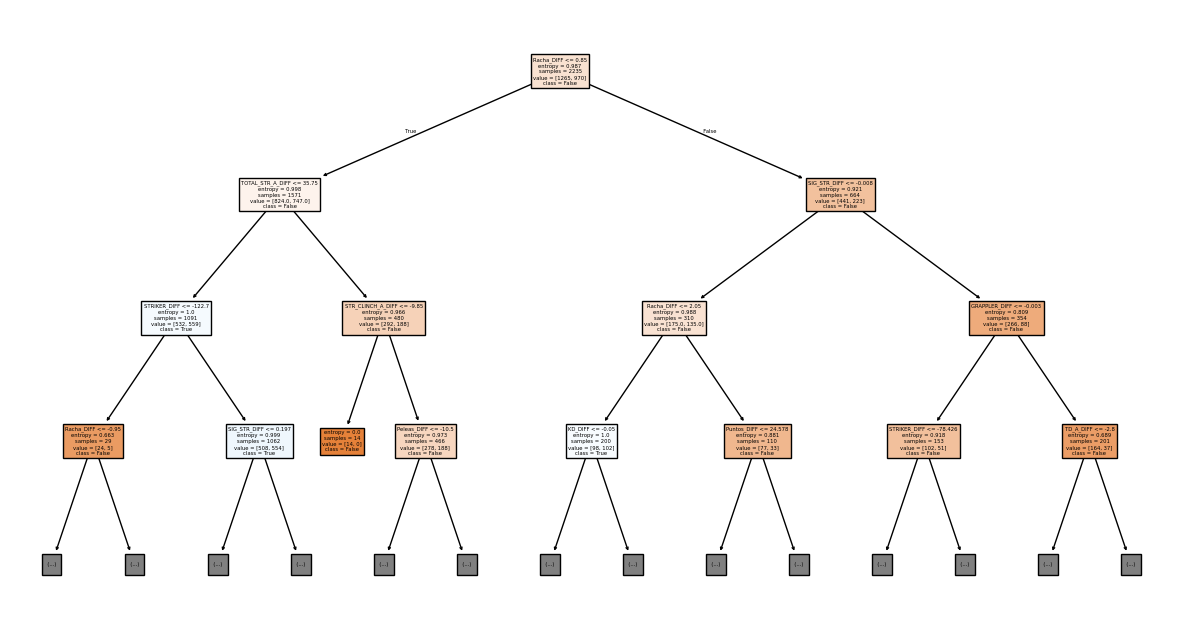

In [29]:
X_train = train.drop(columns=columnasQuitar)
y_train = train['WINNER']
X_val = val.drop(columns=columnasQuitar)
y_val = val['WINNER']

#scaler = MinMaxScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_val_normalized = scaler.transform(X_val)
#no mejora normalizando los datos


tree = train_decision_tree_grid(X_train, y_train, X_val, y_val)

In [30]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = tree.predict(X_val)
y_val_prob = tree.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)
print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))


-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.5334728033472803
F1-Score: 0.4778
AUC-ROC: 0.5294
Precisión: 0.4904
Sensibilidad: 0.4658
Log-loss: 1.506092492433679
[[153 106]
 [117 102]]


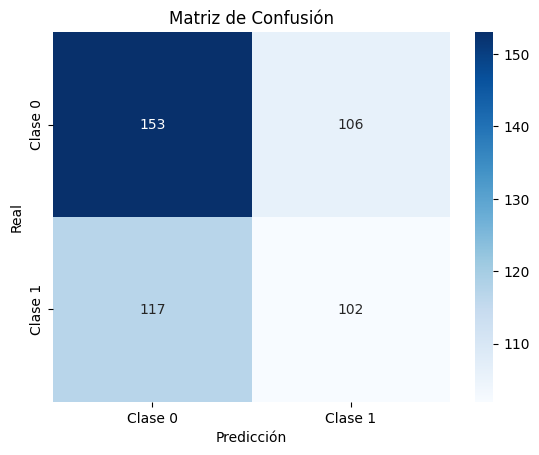

In [31]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Como vemos, con Grid Search el modelo tiene un recall y f1-score bastante alto cuando predice False y bastante bajo cuando predice True. Además, casi siempre predice False.

In [32]:
def train_decision_tree_random(X_train, y_train, X_val, y_val):
    from sklearn.tree import plot_tree
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

    # Definir modelo base
    dt2 = DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict)

    # Distribución de hiperparámetros para búsqueda aleatoria
    param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [int(x) for x in np.arange(3, 30, 3)],
    "min_samples_split": [int(x) for x in np.arange(2, 20, 2)],
    "min_samples_leaf": [int(x) for x in np.arange(1, 20, 2)],
    "max_features": ["sqrt", "log2", None],
    "splitter": ["best", "random"],
    }
    #  ['ccp_alpha', 'class_weight', 'max_leaf_nodes', 'min_impurity_decrease',
    #  'min_weight_fraction_leaf', 'monotonic_cst', 'random_state']  otros posibles parámetros

    # Definir la métrica de optimización como el F1-score macro
    #f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda con validación cruzada
    random_search = RandomizedSearchCV(
        estimator=dt2,
        param_distributions=param_dist,
        scoring="accuracy",
        n_iter=50,
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )


    # Entrenar el modelo
    random_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", random_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = random_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    plt.figure(figsize=(15, 8))
    plot_tree(random_search.best_estimator_, filled=True, feature_names=X_train.columns, class_names=["False", "True"], max_depth=3)
    plt.show()

    return random_search.best_estimator_

-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 9, 'criterion': 'gini'}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.57      0.42      0.49       259
        True       0.48      0.62      0.54       219

    accuracy                           0.51       478
   macro avg       0.52      0.52      0.51       478
weighted avg       0.53      0.51      0.51       478



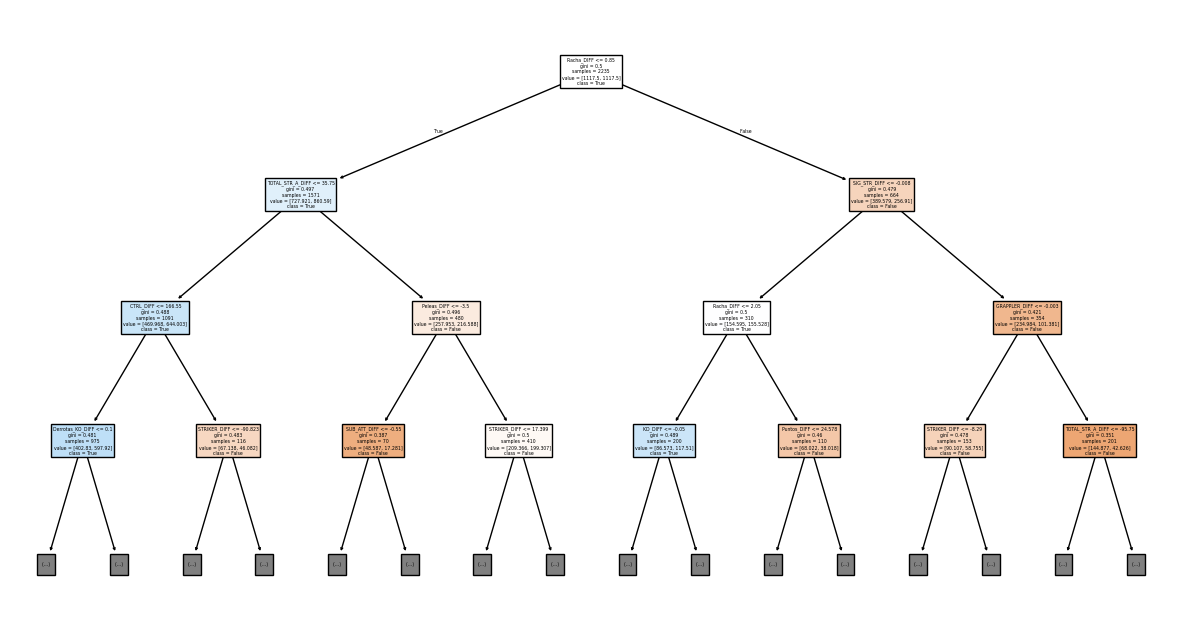

In [33]:
print("-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --")
tree2 = train_decision_tree_random(X_train,y_train,X_val,y_val)

In [34]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = tree2.predict(X_val)
y_val_prob = tree2.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)

print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))



-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.5146443514644351
F1-Score: 0.5397
AUC-ROC: 0.5291
Precisión: 0.4772
Sensibilidad: 0.6210
Log-loss: 3.0325437319882043
[[110 149]
 [ 83 136]]


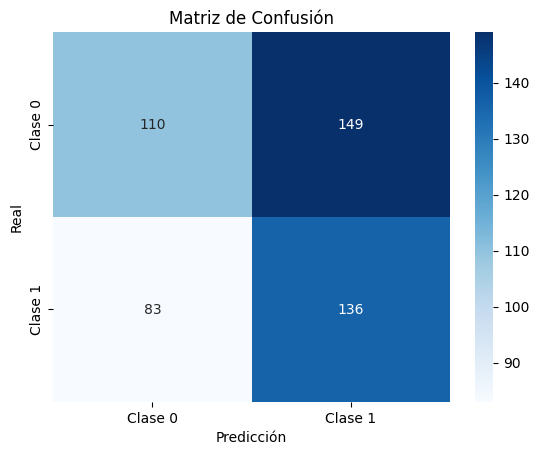

In [35]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

En este caso vemos que el modelo de Random Search mejora cuando se predice True respecto al modelo anterior, pero la accuracy es un poco más baja.